In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [18]:
dge = pd.read_csv(f"/Users/alaa/Documents/ucsf/data/suliman/merlin/dge/experiment1_dge_results_hivdx_library_pool_duplicationrate_patient_id_limma_voom_2024-12-23.csv")
dge

,Unnamed: 0,logFC,AveExpr,t,P.Value,adj.P.Val,B
0,LARP1,-0.530222,5.334949,-8.029652,1.276079e-13,2.363043e-09,20.432554
1,ZCCHC2,-1.154981,4.788284,-7.778475,5.678153e-13,5.257401e-09,19.004158
2,AGRN,-1.554540,2.573883,-7.616328,1.471179e-12,7.186795e-09,18.038134
3,CD38,-1.207130,3.390688,-7.607128,1.552391e-12,7.186795e-09,18.026229
4,RNF213,-1.060433,8.211659,-7.519611,2.584050e-12,9.570287e-09,17.499590
...,...,...,...,...,...,...,...
18513,HMGCR,-0.000718,4.276280,-0.008033,9.935996e-01,9.964515e-01,-6.457175
18514,UBE2O,-0.002892,4.471011,-0.032042,9.744742e-01,9.871075e-01,-6.457374
18515,SKIC2,-0.002101,4.377162,-0.037297,9.702897e-01,9.857266e-01,-6.457442
18516,SLC2A1,-0.001302,4.486215,-0.015491,9.876579e-01,9.934284e-01,-6.457602


In [19]:
dge = dge.rename(columns={'P.Value': 'pvalue', 'adj.P.Val': 'qvalue'})

In [25]:
dge['pvalue'].unique()

array([1.27607884e-13, 5.67815257e-13, 1.47117889e-12, ...,
       9.70289735e-01, 9.87657882e-01, 9.85236647e-01])

In [26]:
dge.loc[dge['pvalue']==0]

,Unnamed: 0,logFC,AveExpr,t,pvalue,qvalue,B


In [27]:
# normed_counts = pd.read_csv("/Users/alaa/Documents/ucsf/data/mk/Nanostring/counts/experiment3_nanostringdiff_normalized_countdata_2023-09-01_ideo_qc_filters.csv")
# normed_counts

In [137]:
# normed_counts.loc[normed_counts['Unnamed: 0']=='LIPG'].to_numpy()

In [29]:
dge['logFC'].unique()

array([-5.30221968e-01, -1.15498145e+00, -1.55453966e+00, ...,
       -2.10056454e-03, -1.30166548e-03, -2.41963635e-03])

In [30]:
dge.loc[dge['pvalue']<=0, 'pvalue'] = dge.loc[dge['pvalue']>0, 'pvalue'].min()
dge.loc[dge['qvalue']<=0, 'qvalue'] = dge.loc[dge['qvalue']>0, 'qvalue'].min()

In [31]:
dge.loc[dge['Unnamed: 0']=='COL14A1']

,Unnamed: 0,logFC,AveExpr,t,pvalue,qvalue,B


In [130]:
pvalue_threshold = 0.05
logfc_threshold = 0.5
target_statistic = 'qvalue'

In [131]:
dge['-log10(pvalue)'] = -np.log10(dge[target_statistic])

In [132]:
sig_hivp_dge = dge.loc[(dge[target_statistic]<pvalue_threshold)
                      &(dge['logFC']>logfc_threshold)].copy()
sig_hivn_dge = dge.loc[(dge[target_statistic]<pvalue_threshold)
                      &(dge['logFC']<=-logfc_threshold)].copy()
insig_dge = dge.loc[(~dge['Unnamed: 0'].isin(sig_hivp_dge['Unnamed: 0'].unique()))
                   &(~dge['Unnamed: 0'].isin(sig_hivn_dge['Unnamed: 0'].unique()))].copy()

In [133]:
dge['-log10(pvalue)'].min(), dge['-log10(pvalue)'].max()

(6.055400567688526e-06, 8.626528412946204)

In [134]:
sig_hivp_dge.shape

(309, 8)

In [135]:
sig_hivn_dge.shape

(579, 8)

In [136]:
sig_hivp_dge['Unnamed: 0'].unique()

array(['IL23A', 'SIAH1', 'ZNF540', 'LRRN3', 'NOG', 'SMIM27', 'ID3',
       'CRIP2', 'TNFRSF25', 'MMP28', 'SNHG8', 'GAS5', 'CCR7', 'KLRB1',
       'MPZL3', 'LOC124902786', 'LCN10', 'FAM153A', 'EEF1B2', 'RGCC',
       'MAL', 'TOMM7', 'FCER2', 'LINC02397', 'PI16', 'FBLN5', 'LTB',
       'AK5', 'LOC112268225', 'PLEKHB1', 'DHRS3', 'RPL34', 'CD40LG',
       'IMPA2', 'LOC101927069', 'NDRG2', 'VSIG1', 'RPS21', 'N4BP3',
       'IL7R', 'LYSMD1', 'GAL3ST4', 'LINC00685', 'CMTM8', 'RASL11A',
       'TMIGD2', 'ZNF204P', 'PFN2', 'OVGP1', 'TCTN1', 'LOC107985563',
       'SGK1', 'TCEA3', 'TIGD3', 'EFHC2', 'B3GALT2', 'VPREB3', 'MIR17HG',
       'LINC00926', 'HKDC1', 'ABCB4', 'FCER1A', 'SLC5A5', 'CCR6', 'TLE2',
       'BEX5', 'ANKRD44.AS1', 'FAM153B', 'NETO1', 'EPHA1', 'LINC02975',
       'SIGLEC17P', 'CLEC9A', 'LOC124905230', 'CXCR5', 'SELENOM', 'ZFP30',
       'BEX2', 'RPL27', 'TRABD2A', 'LOC124904314', 'TNK1', 'YPEL3.DT',
       'LOC105371100', 'RORC', 'SPEF2', 'CEROX1', 'KCNG1', 'TSPAN13',
       'AT

In [137]:
sig_hivn_dge['Unnamed: 0'].unique()

array(['LARP1', 'ZCCHC2', 'AGRN', 'CD38', 'RNF213', 'GRAMD1B', 'ZNF496',
       'EPSTI1', 'PALM2AKAP2', 'HIVEP3', 'HELZ2', 'SBK1', 'IFI44L',
       'CASZ1', 'PARP10', 'XAF1', 'MVB12B', 'GBP4', 'EIF2AK2', 'OAS2',
       'OAS3', 'SRGAP2', 'TMEM268', 'RNF213.AS1', 'CMPK2', 'FRMPD3',
       'RUBCN', 'TRIM14', 'SIGLEC1', 'BISPR', 'IFI44', 'SFMBT2',
       'KLHDC7B', 'SMTNL1', 'MKI67', 'APOL6', 'HEG1', 'SERPING1', 'CDCA7',
       'HERC5', 'NTNG2', 'HCFC1', 'ATP10A', 'RUNX3', 'CHST12', 'LY6E',
       'CMTR1', 'KIAA1671', 'DBF4B', 'OAS1', 'RSAD2', 'CIMAP1B', 'CAPN15',
       'NSD2', 'PTP4A1', 'ANKRD52', 'SHFL', 'DUSP5', 'REC8', 'NLRC5',
       'FBXO41', 'DDX60', 'LAMP3', 'MOV10', 'EIF4G3', 'FMNL2', 'FASN',
       'SAMD9L', 'LAG3', 'RTP5', 'MX1', 'MASTL', 'PARP12', 'STAT2',
       'OASL', 'PATL1', 'NCOR2', 'VANGL1', 'DHX58', 'ATF3', 'AHDC1',
       'PML', 'SPATS2L', 'OTOF', 'USP18', 'ABL1', 'BCL9L', 'MYRF',
       'IFI27', 'ZFYVE26', 'LOC102723458', 'JAKMIP1', 'NFATC2', 'HERC6',
       'SLC1A4'

In [138]:
genes_to_exclude = []

In [139]:
# all_gene_names = dge['Unnamed: 0'].unique().tolist()
# genes_to_include = [
#     'PTAFR', 'MMP7', 'SIGLEC5', 'CD19', 'IL11', 'CFTR', 'LPA',  'COL6A5', 
#     'ARG1', 'FGG', 'NR1H4', 'MMP3', 'MMP7', 'MMP13', 'ACTA1',
#     'ACSM3', 'KLF5', 'CCR2', 'CCR4', 'FGF21', 'CSF3R', 'CXCR1', 'IL2RB',
#     'COL7A1','TLR2', 'TLR6', 'TLR8', 'NFAM1', 'FCGR3A/B',
#     'IL13','RASGRP4', 'NLRC4', 'S100A12', 'IL21R',
#     'ABCA1', 'ACACA', 'ELOVL6', 'FASN', 'LPL', 
#     'NDUFS3', 'NDUFB5', 'GLUT4'
# ]

In [140]:
# genes_to_exclude = set(all_gene_names) - set(genes_to_include)
# genes_to_exclude

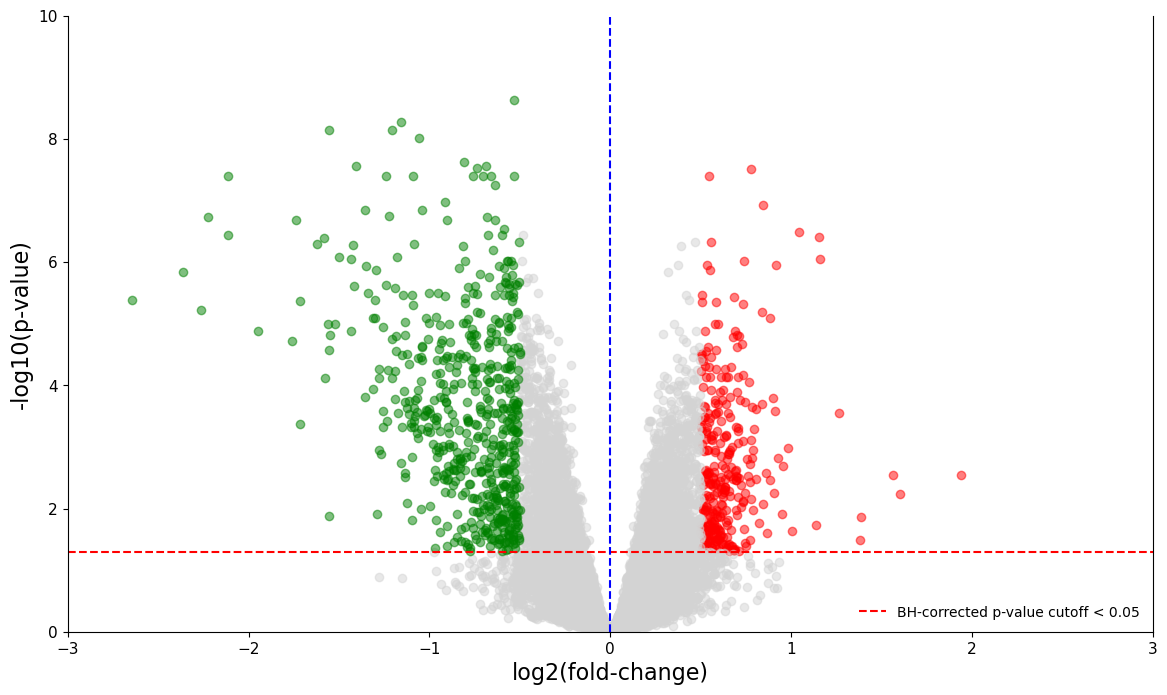

In [144]:
x1 = sig_hivp_dge['logFC']
y1 = sig_hivp_dge['-log10(pvalue)']

x2 = insig_dge['logFC']
y2 = insig_dge['-log10(pvalue)']


x3 = sig_hivn_dge['logFC']
y3 = sig_hivn_dge['-log10(pvalue)']

f, ax = plt.subplots(1, 1, facecolor='w', figsize=(14,8))

# Create a 1x3 grid of subplots
# fig = plt.figure(figsize=(14, 8))
# gs = gridspec.GridSpec(1, 3, width_ratios=[1, 4, 1])
# gs.update(wspace=0.04)  # Adjust the horizontal spacing
# plt.subplots_adjust(left=0.1,
#                     bottom=0.1, 
#                     right=0.9, 
#                     top=0.9, 
#                     wspace=0.04, 
#                     hspace=0.1)
# f.subplots_adjust(hspace=5)
# plot the same data on both axes
# ax0 = plt.subplot(gs[0])
# ax0.scatter(x1, y1, color='lightcoral', alpha=0.5)
# ax0.scatter(x2, y2, color='lightgrey', alpha=0.5)
# ax0.axhline(-np.log10(pvalue_threshold), linestyle='dashed', color='red')

# ax = plt.subplot(gs[1])
ax.scatter(x1, y1, color='red', alpha=0.5, label='')
ax.scatter(x2, y2, color='lightgrey', alpha=0.5, label='')
ax.scatter(x3, y3, color='green', alpha=0.5, label='')
ax.axhline(-np.log10(pvalue_threshold), linestyle='dashed', color='red', 
           label=f'BH-corrected p-value cutoff < {pvalue_threshold}')
ax.axvline(0, linestyle='dashed', color='blue')

# ax2 = plt.subplot(gs[2])
# ax2.scatter(x1, y1, color='lightcoral', alpha=0.5, label=f'p-value < {pvalue_threshold}')
# ax2.scatter(x2, y2, color='lightgrey', alpha=0.5, label=f'p-value >= {pvalue_threshold}')
# ax2.axhline(-np.log10(pvalue_threshold), linestyle='dashed', color='red')

# ax0.set_xlim(-25, -34.5)
ax.set_xlim(-3, 3)
# ax2.set_xlim(15, 42)

# hide the spines between ax and ax2
# ax0.spines['right'].set_visible(False)
# ax0.spines['top'].set_visible(False)
# ax.spines['left'].set_visible(False)
# ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
# ax2.spines['left'].set_visible(False)
# ax2.spines['top'].set_visible(False)
# ax.yaxis.tick_left()
# ax.tick_params(labelright='off')
# ax2.yaxis.tick_right()

ax.set_ylim(0, 10)
ax.set_xlabel('log2(fold-change)', fontsize=16)
ax.set_ylabel('-log10(p-value)', fontsize=16)
# Increase the font size of y-axis tick labels
ax.tick_params(axis='y', labelsize=11) 
ax.tick_params(axis='x', labelsize=11) 

# ax0.set_ylabel('-log10(p-value)', fontsize=11)

# Explicitly set y-axis tick labels for ax1
# ax0.set_yticks(np.arange(0, 9))
# ax0.set_yticklabels(np.arange(0, 9))

# Remove the y-axis ticks
# ax.set_yticks([])
# ax2.set_yticks([])

# for i, row in sig_hivp_dge.iterrows():
#     if row['Unnamed: 0'] not in genes_to_exclude:
#         ax.annotate(row['Unnamed: 0'], (row['logFC'], row['-log10(pvalue)']+0.1), 
#                     fontsize=9)
    
# for i, row in sig_hivn_dge.iterrows():
#     if row['Unnamed: 0'] not in genes_to_exclude:
#         ax.annotate(row['Unnamed: 0'], (row['logFC'], row['-log10(pvalue)']+0.1), 
#                     fontsize=9)

# This looks pretty good, and was fairly painless, but you can get that
# cut-out diagonal lines look with just a bit more work. The important
# thing to know here is that in axes coordinates, which are always
# between 0-1, spine endpoints are at these locations (0, 0), (0, 1),
# (1, 0), and (1, 1).  Thus, we just need to put the diagonals in the
# appropriate corners of each of our axes, and so long as we use the
# right transform and disable clipping.

# d1 = .015  # how big to make the diagonal lines in axes coordinates
# d2 = .015
# d3 = .015
# # arguments to pass plot, just so we don't keep repeating them
# kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
# ax.plot((1+0.0075, 1+d1), (-d1, +d1), **kwargs)
# ax.plot((1+0.0075, 1+d1), (1-d1, 1+d1), **kwargs)

# kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
# ax2.plot((-d2, +d2), (1-d2, 1+d2), **kwargs)
# ax2.plot((-d2, +d2), (-d2, +d2), **kwargs)

# # arguments to pass plot, just so we don't keep repeating them
# kwargs.update(transform=ax0.transAxes)
# ax0.plot((1, 1+d1), (-d1, +d1), **kwargs)
# ax0.plot((1, 1+d1), (1-d1, 1+d1), **kwargs)

# kwargs.update(transform=ax.transAxes)  # switch to the bottom axes
# ax.plot((-d3+0.026, +d3), (1-d3, 1+d3), **kwargs)
# ax.plot((-d1+0.026, +d1), (-d1, +d1), **kwargs)
plt.legend(loc='lower right', frameon=False)
ax.set_title("", fontsize=19)
plt.savefig(f"/Users/alaa/Documents/ucsf/data/suliman/merlin/dge/dge_experiment1_hivdx_library_pool_duplication-rate_patient_id_2024-12-23_volcano_plot_logFC04_q05.png",
            dpi=1100)
plt.show()

In [73]:
sig_hivp_norace_genes = sig_hivp_dge['Unnamed: 0'].unique()

In [74]:
sig_hivn_norace_genes = sig_hivn_dge['Unnamed: 0'].unique()

In [107]:
sig_hivp_race_genes = sig_hivp_dge['Unnamed: 0'].unique()

In [108]:
sig_hivn_race_genes = sig_hivn_dge['Unnamed: 0'].unique()

In [109]:
print(len(sig_hivp_race_genes), len(sig_hivp_norace_genes))
overlap_hivp_genes = set(sig_hivp_race_genes).intersection(sig_hivp_norace_genes)
print(len(overlap_hivp_genes))
print(overlap_hivp_genes)

43 50
2
{'ACTA1', 'NOS1'}


In [110]:
print(len(sig_hivn_race_genes), len(sig_hivn_norace_genes))
overlap_hivn_genes = set(sig_hivn_race_genes).intersection(sig_hivn_norace_genes)
print(len(overlap_hivn_genes))
print(overlap_hivn_genes)

8 24
0
set()
